<a href="https://colab.research.google.com/github/Hieudo02/AI-Exercise/blob/main/Pre_trained_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
MTCNN (Multi Task Cascaded CNN)
+ Nhận dạng được chính xác các vị trí của từng bộ phận trên khuôn mặt
'''

In [2]:
pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 25.2 MB/s eta 0:00:00


In [4]:
from matplotlib import pyplot as plt
from mtcnn import MTCNN

In [6]:
filename = '/content/drive/MyDrive/Colab Notebooks/korean.jpg'
pixels = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(pixels)
for face in faces:
  print(face)

'''
box[x, y, width, height]
confidence (accuracy)
keypoints
'''

1/1 [==============================] - 0s 174ms/step


1/1 [==============================] - 0s 110ms/step
{'box': [180, 157, 281, 365], 'confidence': 0.9990555644035339, 'keypoints': {'left_eye': (252, 302), 'right_eye': (381, 303), 'nose': (317, 380), 'mouth_left': (269, 442), 'mouth_right': (370, 442)}}


1/1 [==============================] - 0s 116ms/step


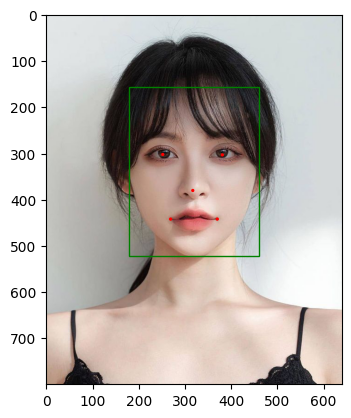

In [18]:
#Tạo ô vuông bao quanh khuôn mặt
from matplotlib import pyplot as plt
from mtcnn import MTCNN

filename = '/content/drive/MyDrive/Colab Notebooks/korean.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
plt.imshow(img)

ax = plt.gca()
for face in faces:
  x, y, width, height = face['box']
  rect = plt.Rectangle((x,y), width, height, fill = False, color = 'green') #Tạo khung
  ax.add_patch(rect) #chồng khung lên ảnh
  for key, value in face['keypoints'].items():
    dot = plt.Circle(value, radius = 2, color = 'red') #vẽ chấm tròn lên các bộ phận trên khuôn mặt
    ax.add_patch(dot)
    plt.savefig('/content/drive/MyDrive/Colab Notebooks/mtcnnImage/Korean.jpg') #lưu ảnh có chứa khung

plt.show()

2/2 [==============================] - 0s 14ms/step


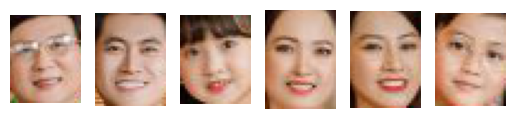

In [32]:
#cắt khuôn mặt ra 
from matplotlib import pyplot as plt
from mtcnn import MTCNN
from PIL import Image

def drawFaces(filename, result_list):
  data = plt.imread(filename)
  for i in range(len(result_list)):
    x1, y1, width, height = result_list[i]['box']
    x2, y2 = x1 + width, y1 + height
    plt.subplot(1, len(result_list), i+1)
    plt.axis('off')
    plt.imshow(data[y1:y2, x1:x2])

    #lưu từng ảnh đã cắt
    face_image = Image.fromarray(data[y1:y2, x1:x2])
    face_image.save(f"/content/drive/MyDrive/Colab Notebooks/MTCNN_Image/familyMember/face_{i}.jpg")
  
  plt.show()

filename = '/content/drive/MyDrive/Colab Notebooks/family.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
drawFaces(filename, faces)

In [ ]:
#VGG16
#ResNet (VGG19)
#R_CNN
#YOLO 8 (phải down về và cài vào)
#Fastor R CNN

In [44]:
#ResNet50
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/drive/MyDrive/Colab Notebooks/common_Image/9HeadDragon.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

1/1 [==============================] - 1s 1s/step
Predicted: [('n01795545', 'black_grouse', 0.08298883), ('n01798484', 'prairie_chicken', 0.058544468), ('n13052670', 'hen-of-the-woods', 0.05052962)]


In [59]:
#VGG16
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np

# Load the pre-trained VGG16 model with fully connected layers
model = VGG16(weights='imagenet', include_top=True)

# Load the image and preprocess it
img_path = '/content/drive/MyDrive/Colab Notebooks/common_Image/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Make a prediction
preds = model.predict(x)

# Decode the predictions
preds = decode_predictions(preds, top=3)[0]

for pred in preds:
    print(pred[1], ':', pred[2]*100, '%')

1/1 [==============================] - 1s 868ms/step
African_elephant : 81.59511089324951 %
tusker : 8.211512118577957 %
Indian_elephant : 6.473923474550247 %


In [ ]:
#VGG19
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
import numpy as np

base_model = VGG19(weights='imagenet')
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_pool').output)

img_path = '/content/drive/MyDrive/Colab Notebooks/common_Image/elephant.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

block4_pool_features = model.predict(x)

# Decode the block4_pool features into predictions
preds = decode_predictions(block4_pool_features, top=3)[0]

# Print the predictions
print('Predictions:')
for pred in preds:
    print(pred[1], '--', pred[2])

In [ ]:
#Fastor R CNN